# Plotting Functions in Python

### Visualization Functions in Python

The following functions will help to plot various commonly occuring combinations of continuous and categorical variables for a quick data exploration
<br>
<br>
<br>
The function **univariate_cont** can be used for univariate analysis of continuous variables.
<br>
The function **univariate_categ** can be used for univariate analysis of categorical variables.
<br>
The function **bivariate_categ_cont** can be used for bivariate analysis of categorical vs continuous variables.
<br>
The function **bivariate_categ_categ** can be used for bivariate analysis of categorical vs categorical variables.
<br>
The function **bivariate_cont_cont** can be used for bivariate analysis of coninuous vs coninuous variables. If a legend is passed of a categorical variable, it can be used for multivariate analysis as well.
<br>
The function **bivariate_contlist_contlist** can be used for multivariate analysis of several continuous variables.
<br>
The function **multivariate_1cont_2categ** can be used for multivariate analysis of 1 continuous and 2 categorical variables.
<br>
The function **cont_categ_variables** helps to separate our continuous and categorical variables in a dataset based on the data types provided to it. This should give the right variables only if the data type is set correctly.
<br>
<br>


In [295]:
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats


# Calculating the Bins for histogram as recommended by Struges
def bins_struges(data):
    import math
    bins_ = int(1+ 3.322 * math.log(len(data),10))
    return bins_

# Plots for univariate continuous variables
def univariate_cont(cont_var,data,bins_=10):    
    sn.set_palette("muted")
    print("Count {}".format(len(data[cont_var])))
    print("Null found {}".format(sum(data[cont_var].isnull())))
    print(data[[cont_var]].describe())
    plt.figure(1)
    plt.subplot(221)
    histogram = plt.hist(data[cont_var],bins=bins_)
    histogram
    plt.subplot(222)
    distplot = sn.distplot(data[cont_var])
    distplot
    plt.subplot(223)
    box = sn.boxplot(data[cont_var])    
    box
    plt.subplot(224)
    probplot = stats.probplot(data[cont_var],plot=plt)
    probplot

# Plots for univariate categorical variables
def univariate_categ(categ_var,df):
    sn.set_palette("muted")
    print(data[[categ_var]].describe())
    print(df.groupby(categ_var).count())

# Plots for bivariate categorical - continuous variable    
def bivariate_categ_cont(categ_var,cont_var,df):
    qualitative_colors = sn.color_palette("muted")
    print(df.groupby(categ_var)[cont_var].median())
    plt.figure(1)    
    plt.subplot(221)
    sn.barplot(x=categ_var,y=cont_var,data=df)
    plt.subplot(222)
    sn.boxplot(x=categ_var,y=cont_var,data=df)
    plt.subplot(223)
    i = 0
    for val in set(list(df[categ_var])):
        sn.distplot(df[df[categ_var]==val][cont_var],color=qualitative_colors[i],label=val)    
        i=i+1

# Plots for bivariate categorical - categorical variable
def bivariate_categ_categ(categ_var1,categ_var2,df):
    mosaic(df,[categ_var1,categ_var2])

# Plots for bivariate continuous - continuous variable
def bivariate_cont_cont(cont_var1,cont_var2,df,legend=None):
    sn.set_palette("muted")
    plt.figure(1)
    plt.subplot(221)
    if legend:
        plt.scatter(x=df[cont_var1],y=df[cont_var2],hue=df[legend])
    else:
        plt.scatter(x=df[cont_var1],y=df[cont_var2])
    plt.subplot(222)
    sn.regplot(x=cont_var1,y=cont_var2,data=df)

# Plots for multiple continuous - continuous variables as a list
def bivariate_contlist_contlist(cont_var_list,df,legend=None):
    sn.set_palette("muted")
    plt.figure(1)
    if legend:
        sn.pairplot(df[cont_var_list],hue=df[legend],height=2)
    else:
        sn.pairplot(df[cont_var_list],height=2)
    plt.figure(2)
    print(df[cont_var_list].corr())
    plt.figure(3)
    #sn.heatmap(df[cont_var_list].corr(),annot=True)
    ax = sn.heatmap(
        df[cont_var_list].corr(), 
        vmin=-1, vmax=1, center=0,
        cmap=sn.diverging_palette(20, 220, n=200),
        square=True )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
        );
    
# Plots for 1 continuous and 2 categorical variables  
def multivariate_1cont_2categ(cont_var,categ_var1,categ_var2,df):
    sn.set_palette("muted")
    with sns.axes_style(style='ticks'):
        g = sns.factorplot(categ_var1, cont_var, categ_var2, data=df, kind="box")
        g.set_axis_labels(categ_var1, cont_var);

# Differentiating Continuous and Categorical Variables
def cont_categ_variables(df):
    cont = []
    categ = []
    for each in list(df):
        if df[each].dtype.kind in 'bifc':            
            cont.append(each)
        else:
            categ.append(each)
    return cont,categ

In [280]:
data = sn.load_dataset("iris")

In [281]:
data.info()
data[["petal_width"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,petal_width
count,150.000000
mean,1.199333
std,0.762238
min,0.100000
25%,0.300000
50%,1.300000
75%,1.800000
max,2.500000


Count 150
Null found 0
       sepal_length
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000


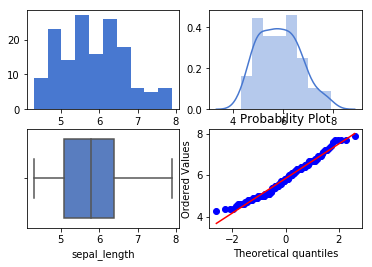

In [296]:
univariate_cont("sepal_length",data,bins_=10)

species
setosa        5.0
versicolor    5.9
virginica     6.5
Name: sepal_length, dtype: float64


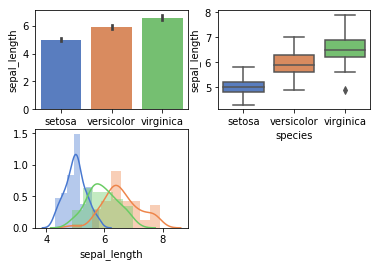

In [273]:
bivariate_categ_cont("species","sepal_length",data)

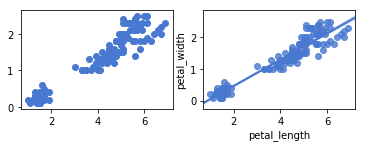

In [267]:
bivariate_cont_cont("petal_length","petal_width",data)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


<Figure size 432x288 with 0 Axes>

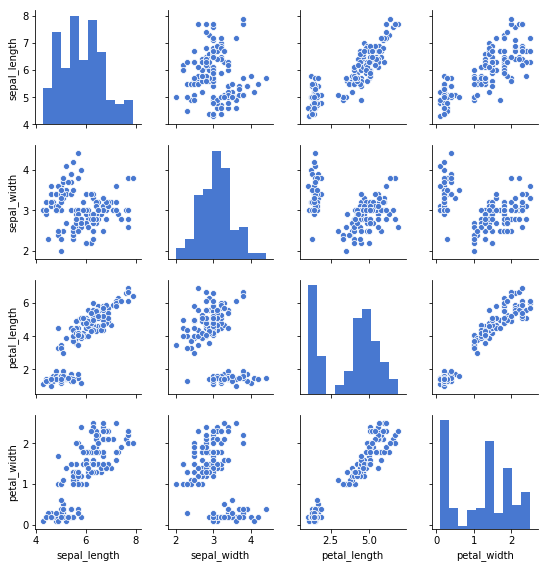

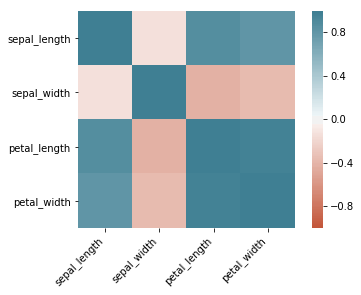

In [288]:
cont_var_list = ["sepal_length","sepal_width","petal_length","petal_width"]
bivariate_contlist_contlist(cont_var_list,data)

In [239]:
cont_categ_variables(data)

sepal_length
sepal_width
petal_length
petal_width
species


(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], ['species'])